# Repeating actions with a `for` loop

In this module, we'll look at repeating a given action multiple times for different inputs.

### Prerequisite Python skills

* variables (ints, floats, strings, lists)
* numpy arrays
* simple plots with matplotlib

### Objectives

* Understand the mechanics of the `for` loop
* Apply it to a real world problem

## Recap

In the previous lesson, we learned how to load a temperature anomaly dataset using `numpy.loadtxt` and plot it using matplotlib. The data was downloaded from the [Berkley Earth](http://berkeleyearth.org/) website.

Let's recap how we did that:


In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data for Canada
data_file = 'data/canada-TAVG-Trend.txt'
data = np.loadtxt(data_file, comments='%')

In [3]:
data

array([[ 1.768e+03,  9.000e+00, -1.330e-01, ...,        nan,        nan,
               nan],
       [ 1.768e+03,  1.000e+01, -1.293e+00, ...,        nan,        nan,
               nan],
       [ 1.768e+03,  1.100e+01, -1.209e+00, ...,        nan,        nan,
               nan],
       ...,
       [ 2.013e+03,  7.000e+00,  4.230e-01, ...,        nan,        nan,
               nan],
       [ 2.013e+03,  8.000e+00,  1.242e+00, ...,        nan,        nan,
               nan],
       [ 2.013e+03,  9.000e+00,  2.532e+00, ...,        nan,        nan,
               nan]])

In [4]:
# Select the fields that we want
year = data[:, 0]
month = data[:, 1]
temperature_anomaly = data[:, 4]
year_decimal = year + (month - 1)/12

Text(0,0.5,'Temperature anomaly (C)')

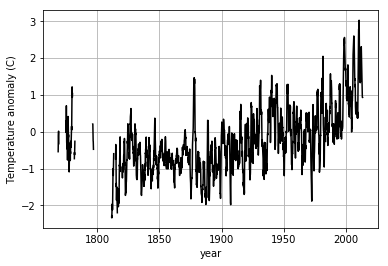

In [5]:
plt.figure()
plt.plot(year_decimal, temperature_anomaly, '-k')
plt.grid()
plt.xlabel('year')
plt.ylabel('Temperature anomaly (C)')

## The problem

Now that we can make this plot for Canada, **we want to add data from other countries to the plot**. 

Our `data` folder has a total of 20 files that we have to load and plot. It would be tedious to do this by copy-paste. It would be impossible if we had 20000 files instead of 20.

In [6]:
!ls data

afghanistan-TAVG-Trend.txt  ghana-TAVG-Trend.txt     pakistan-TAVG-Trend.txt
antarctica-TAVG-Trend.txt   haiti-TAVG-Trend.txt     qatar-TAVG-Trend.txt
bolivia-TAVG-Trend.txt	    japan-TAVG-Trend.txt     spain-TAVG-Trend.txt
canada-TAVG-Trend.txt	    kenya-TAVG-Trend.txt     switzerland-TAVG-Trend.txt
congo-TAVG-Trend.txt	    malaysia-TAVG-Trend.txt  yemen-TAVG-Trend.txt
egypt-TAVG-Trend.txt	    nepal-TAVG-Trend.txt     zimbabwe-TAVG-Trend.txt
finland-TAVG-Trend.txt	    norway-TAVG-Trend.txt


We know how to load and plot data from a single file:

```python
data = np.loadtxt(data_file, comments='%')
year = data[:, 0]
month = data[:, 1]
temperature_anomaly = data[:, 4]
year_decimal = year + (month - 1)/12

plt.plot(year_decimal, temperature_anomaly, '-k')
```

The `for` loop allows us to repeat a given set of actions **for each element in a set of elements**. 

## Introducing the `for` loop

Let's try it on a simpler example first. Say I want to **print the first name of each person in a list of names**.

In [7]:
names = ['Nelson Mandela', 'Albert Einstein', 'Janis Joplin', 'Marie Curie']

In [8]:
# This is how it's done for a single name
name = names[0]
name_components = name.split()
first_name = name_components[0]
print(first_name)

Nelson


In [9]:
# Spell out the instructions in English
for each name in a list of names do this:
name = names[0]
name_components = name.split()
first_name = name_components[0]
print(first_name)

SyntaxError: invalid syntax (<ipython-input-9-bf4c16b702f9>, line 2)

In [10]:
# Translating to Python means placing all of the instructions for a single name to the right
for name in names:
    name_components = name.split()
    first_name = name_components[0]
    print(first_name)

Nelson
Albert
Janis
Marie


## Plotting the temperature anomaly for the 20 countries

In plain English, we could describe the instructions as:

1. Given a list of file names
2. For each file name in the list of file names do the following:
    1. Load the data in that file name
    2. Extract the desired fields from that data
    3. Plot the desired fields
    
The first thing we need is to get a list of all file names. The `glob` function from Python's `glob` module is exactly what we need.

In [11]:
from glob import glob

In [12]:
data_files = glob('data/*.txt')
print(data_files)

['data/ghana-TAVG-Trend.txt', 'data/bolivia-TAVG-Trend.txt', 'data/yemen-TAVG-Trend.txt', 'data/switzerland-TAVG-Trend.txt', 'data/afghanistan-TAVG-Trend.txt', 'data/nepal-TAVG-Trend.txt', 'data/zimbabwe-TAVG-Trend.txt', 'data/japan-TAVG-Trend.txt', 'data/haiti-TAVG-Trend.txt', 'data/norway-TAVG-Trend.txt', 'data/canada-TAVG-Trend.txt', 'data/kenya-TAVG-Trend.txt', 'data/finland-TAVG-Trend.txt', 'data/congo-TAVG-Trend.txt', 'data/spain-TAVG-Trend.txt', 'data/pakistan-TAVG-Trend.txt', 'data/egypt-TAVG-Trend.txt', 'data/antarctica-TAVG-Trend.txt', 'data/malaysia-TAVG-Trend.txt', 'data/qatar-TAVG-Trend.txt']


Now we put it all together:

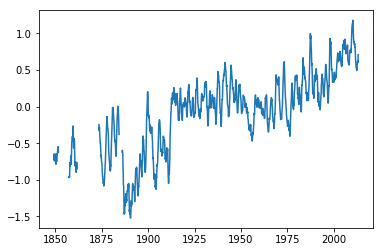

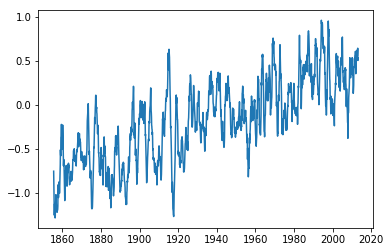

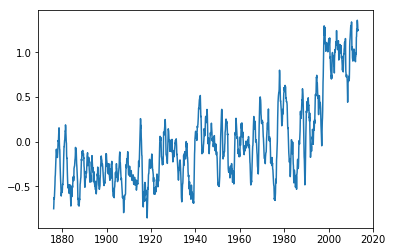

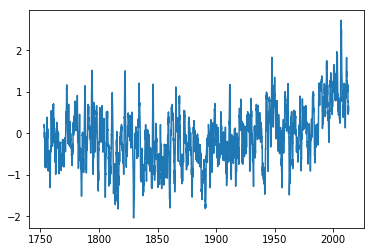

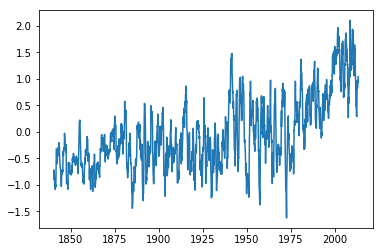

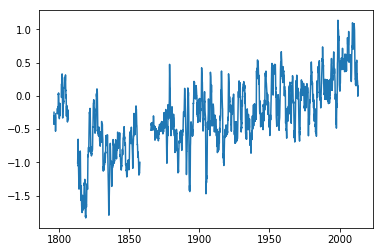

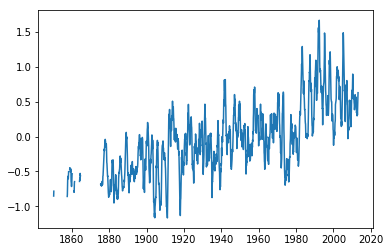

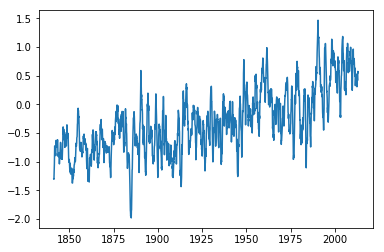

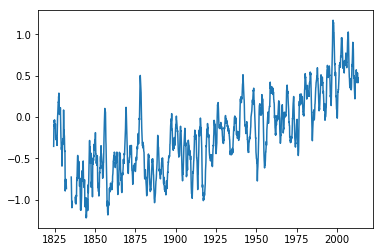

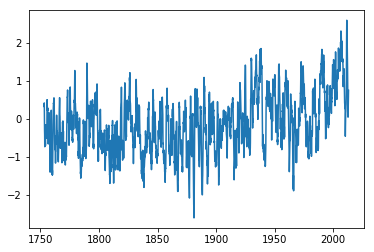

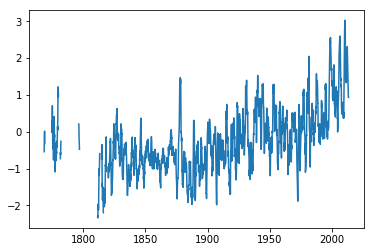

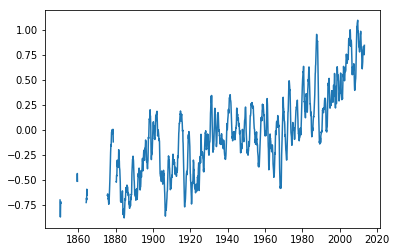

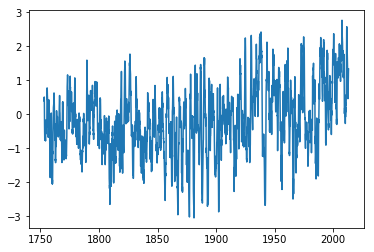

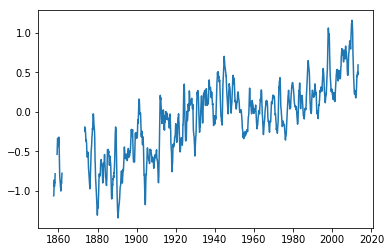

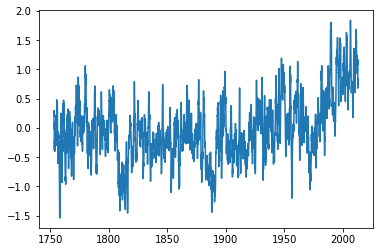

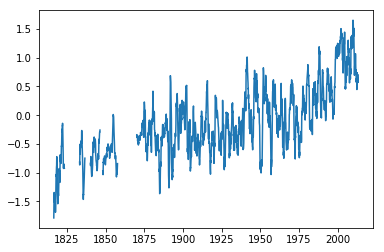

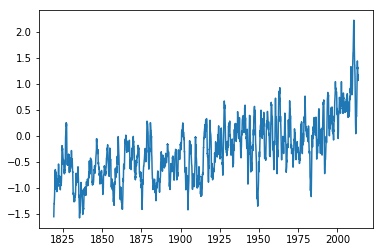

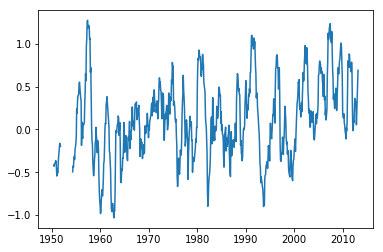

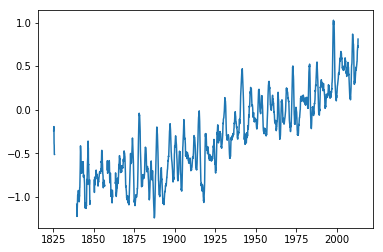

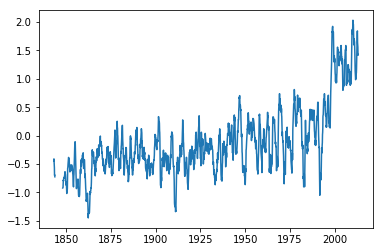

In [13]:
for data_file in data_files:
    data = np.loadtxt(data_file, comments='%')
    year = data[:, 0]
    month = data[:, 1]
    temperature_anomaly = data[:, 4]
    year_decimal = year + (month - 1)/12
    plt.figure()
    plt.plot(year_decimal, temperature_anomaly)

Text(0,0.5,'Temperature Anomaly (C)')

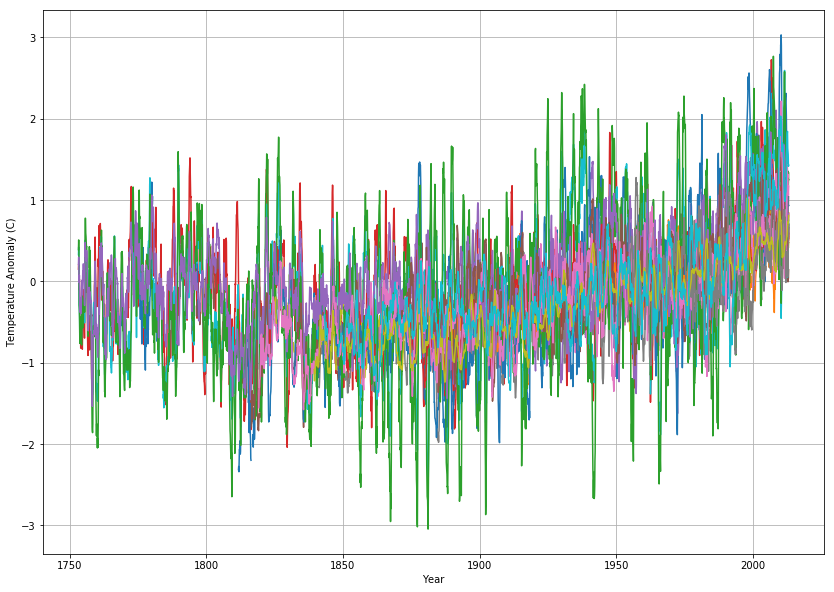

In [14]:
plt.figure(figsize=(14, 10))

for data_file in data_files:
    data = np.loadtxt(data_file, comments='%')
    year = data[:, 0]
    month = data[:, 1]
    temperature_anomaly = data[:, 4]
    year_decimal = year + (month - 1)/12
    
    plt.plot(year_decimal, temperature_anomaly)
    
plt.grid()
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (C)')

## Building a list of values using the *aggregator pattern*

Sometimes, we want to extract or calculate a value based on each element of a list. For example, let's say we want to calculate the minimum and maximum temperature anomalies for each country. A common way of doing this is with the *aggregator pattern*:

1. Start with an empty list
2. For each element of another list do this:
    1. Calculate a new value based on the element
    2. Add the calculated value to the list
    
In the end, our list will be fully populated.

Let's start with a simpler example. We want to **build a list of country names based on the list of data file names**.

First, let's do it for a single data file.

In [15]:
data_file = data_files[0]
data_file

'data/ghana-TAVG-Trend.txt'

In [16]:
folder, file_name = data_file.split('/')
file_name_components = file_name.split('-')
country_name = file_name_components[0]
print(country_name.capitalize())

Ghana


In [17]:
country_names = []
for data_file in data_files:
    folder, file_name = data_file.split('/')
    file_name_components = file_name.split('-')
    country_name = file_name_components[0]
    country_names.append(country_name)

In [18]:
print(country_names)

['ghana', 'bolivia', 'yemen', 'switzerland', 'afghanistan', 'nepal', 'zimbabwe', 'japan', 'haiti', 'norway', 'canada', 'kenya', 'finland', 'congo', 'spain', 'pakistan', 'egypt', 'antarctica', 'malaysia', 'qatar']


## Exercise 1 - Calculate the temperature trend

Now that we know how to load the temperature anomaly time series for each country, we can calculate the **rate of change** for each country. We do this by fitting a straight line to the time series using **linear regression** and taking the estimated **slope**. Fortunately, there are several functions in Python that do this, for example [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html).

**Your task is to**:

1. Calculate the slope of the temperature series for each country
2. Make a bar plot of the temperature rate of change (slope) for each country

**Tips**:
* Remember the *aggregator pattern* for building a list using `.append`.


## Exercise 2 - Downloading a batch of data 

We only used the data from 20 countries. Let's say we want to use all countries in out analysis. The file `countries-all.txt` has a list of sovereign states [scrapped from Wikipedia](https://en.wikipedia.org/wiki/List_of_sovereign_states).

In [19]:
!head countries-all.txt

Afghanistan
Åland
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda


In [20]:
!wc countries-all.txt

 237  345 2580 countries-all.txt


There are 237 countries in the list. Luckily, we can automate the download of a data file using Python's `urllib` module, in particular function [`urllib.request.urlretrieve`](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve).

The URL for a country's data file in Berkeley Earth is `http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/country-name-in-lowercase-TAVG-Trend.txt`. For example, the file for Canada is `http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/canada-TAVG-Trend.txt` and the file for American Samoa is `http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/american-samoa-TAVG-Trend.txt`.

**Your task is to:**

* Download the temperature data file for each country in `countries-all.txt`
* Save each data file in a folder called `data_all`
* Load the data for each of the 237 countries and calculate the rate of temperature change
* Make a bar plot of the rate of change for each country
* *BONUS*: Plot the rate of change in a map